# Recommendation:

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score


In [2]:
#read the data
df_train= pd.read_csv('./datasets/train.csv')

df_test= pd.read_csv('./datasets/test.csv')

In [3]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
#check for null values
df_train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [6]:
#check dtypes
df_train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [7]:
#column names
df_train.columns[0:30]

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond'],
      dtype='object')

In [8]:
df_train.columns[31:50]

Index(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath'],
      dtype='object')

In [9]:
df_train.columns[51:82]

Index(['Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature',
       'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type', 'SalePrice'],
      dtype='object')

In [10]:
df_train.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [11]:
#counts of neighbourhood
df_train['Neighborhood'].value_counts()

Neighborhood
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [12]:
df_train['Total_Sqft']= df_train['Total Bsmt SF']+df_train['Wood Deck SF']+df_train['Open Porch SF']+df_train['1st Flr SF']+df_train['2nd Flr SF']

/Users/rajashreechoudhary/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


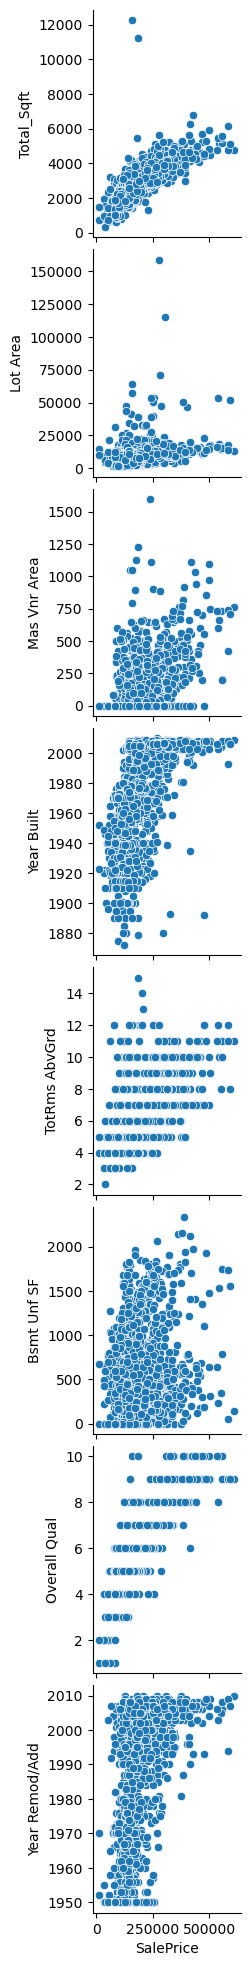

In [13]:
sns.pairplot(df_train, x_vars=['SalePrice'], y_vars=['Total_Sqft','Lot Area',
                                                'Mas Vnr Area','Year Built','TotRms AbvGrd','Bsmt Unf SF','Overall Qual','Year Remod/Add'])

Sales price costs are more on ovearall quality ,Total rooms above gr and sq ft
Year built and Year Remod/add giving showing impact on salesprice

In [17]:
data = pd.concat(
    [
        df_train.groupby('Neighborhood').mean()['SalePrice'],
        df_train.groupby('Neighborhood').count()['Id']
    ], 
    
    axis=1)
f, ax = plt.subplots()
sns.stripplot(data.sort_values(by='SalePrice').SalePrice, data.sort_values(by='SalePrice').index, orient='h', color='red');

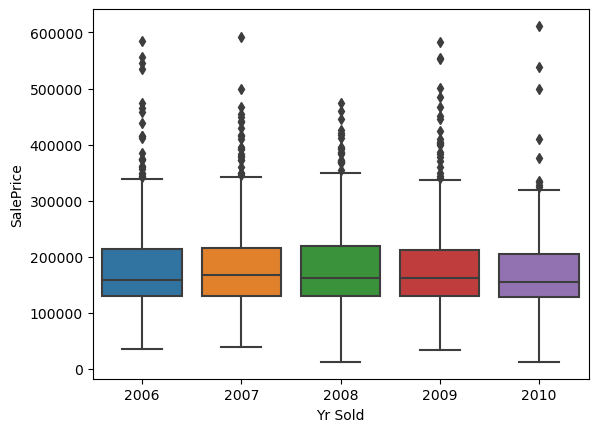

In [52]:
sns.boxplot(x=df_train['Yr Sold'], y=df_train['SalePrice'])
plt.savefig('how price has change over the years.png', bbox_inches='tight')


Ames seems to have been immune at the Recession time . 
There for may be ,Given the city's being ranked by Bloomberg in the top 15 "cities that have done best since the recession".(Wikipedia shows)

<Axes: >

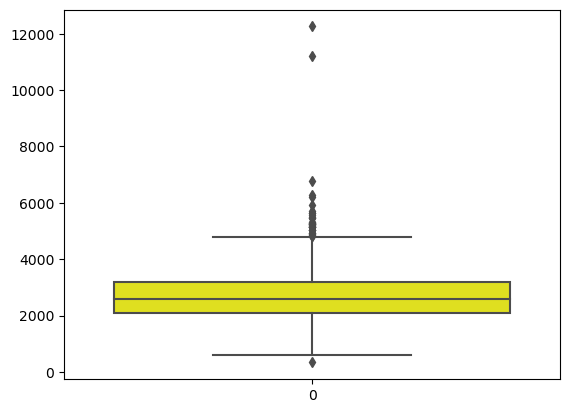

In [19]:
sns.boxplot(df_train['Total_Sqft'],color='yellow')

<Axes: >

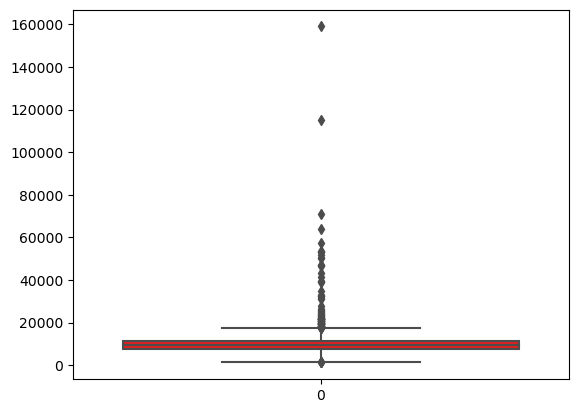

In [20]:
sns.boxplot(df_train['Lot Area'],color ='red')

<Axes: >

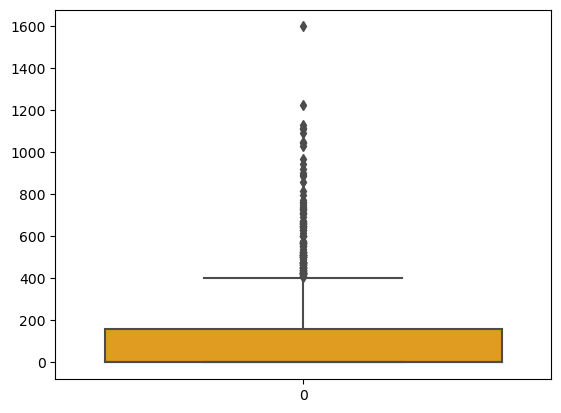

In [21]:
sns.boxplot(df_train['Mas Vnr Area'],color ='orange')

<Axes: >

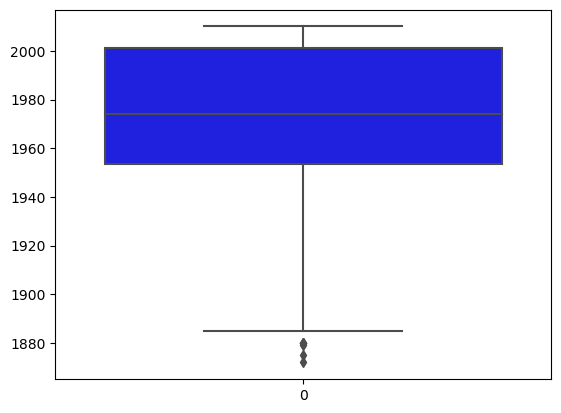

In [22]:
sns.boxplot(df_train['Year Built'],color ='blue')

<Axes: >

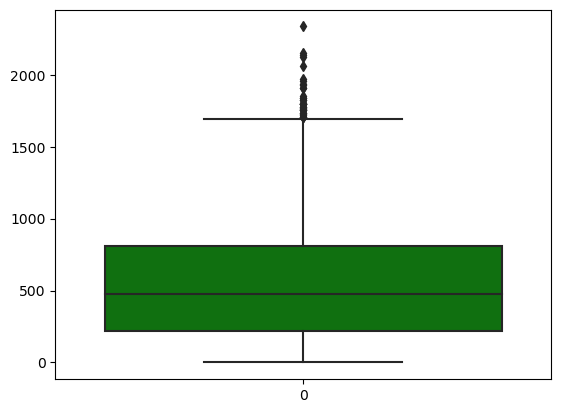

In [23]:
sns.boxplot(df_train['Bsmt Unf SF'],color ='green')

<Axes: >

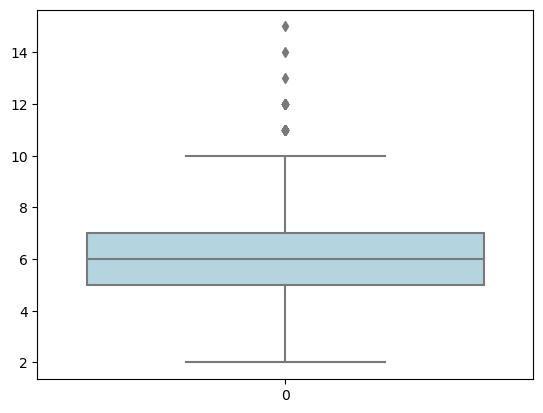

In [25]:
sns.boxplot(df_train['TotRms AbvGrd'],color ='lightblue')

<Axes: >

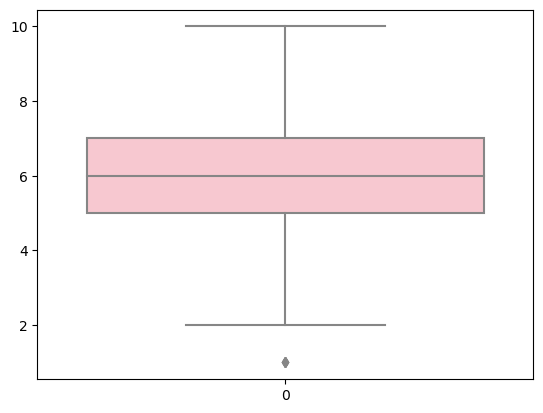

In [26]:
sns.boxplot(df_train['Overall Qual'],color ='pink')

<Axes: >

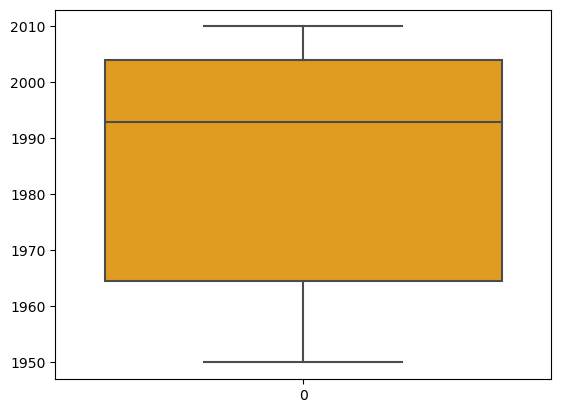

In [27]:
sns.boxplot(df_train['Year Remod/Add'],color ='orange')

In [29]:
df_train.corr(numeric_only = True)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Total_Sqft
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398,-0.035096
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052,-0.184130
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335,-0.080018
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842,0.427270
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566,0.360591
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207,0.665615
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019,-0.145466
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849,0.412684
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370,0.395620
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230,0.468395


In [30]:
X = df_train['Year Built'] 
y = df_train['SalePrice']

/var/folders/hd/8z3slh4d16d2yvs205jh8smw0000gn/T/ipykernel_44138/946875316.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Year Built']).axes.set_xticks(year_ticks);


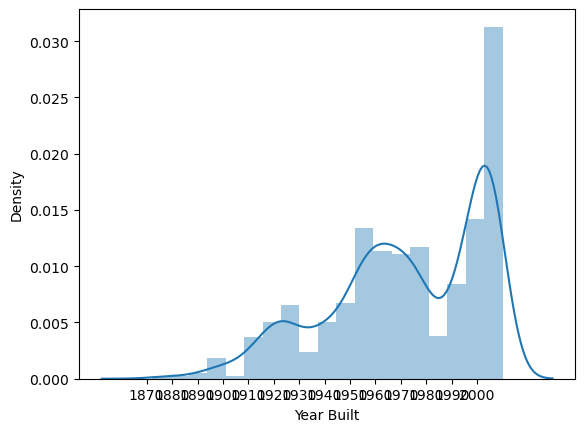

In [31]:
year_ticks = np.arange(1870, 2010, 10)
sns.distplot(df_train['Year Built']).axes.set_xticks(year_ticks);

(array([  7.,  12.,  56., 162., 121., 183., 370., 288., 198., 654.]),
 array([1872. , 1885.8, 1899.6, 1913.4, 1927.2, 1941. , 1954.8, 1968.6,
        1982.4, 1996.2, 2010. ]),
 <BarContainer object of 10 artists>)

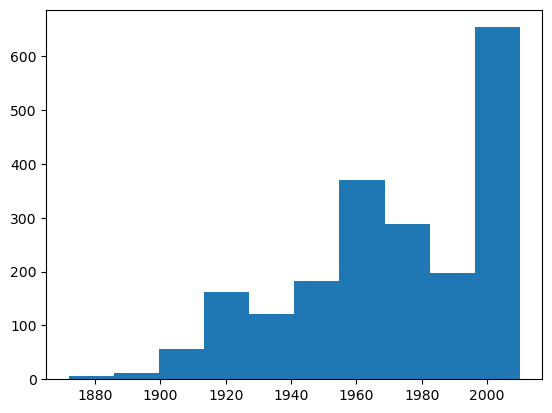

In [32]:
plt.hist(df_train['Year Built'])

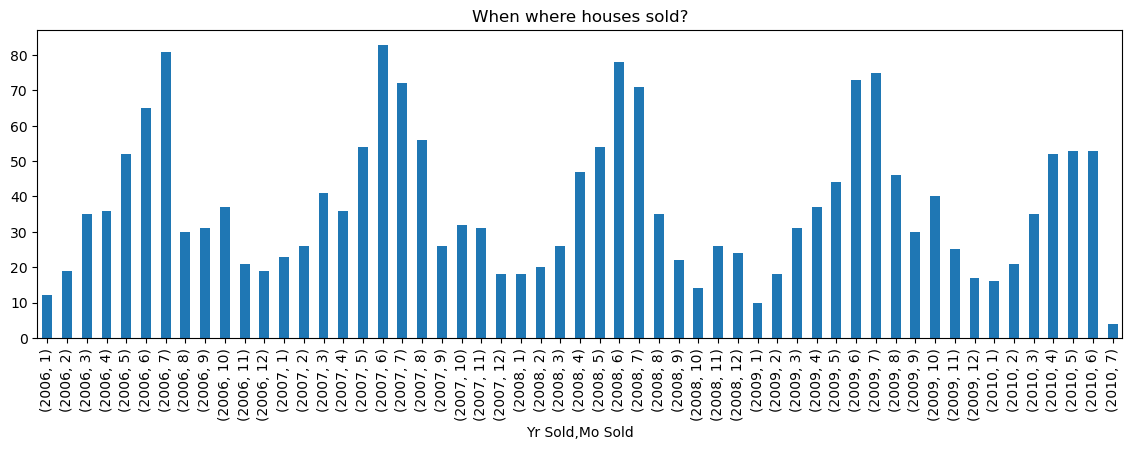

In [51]:
df_train.groupby(['Yr Sold','Mo Sold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When where houses sold?')
plt.savefig('When where houses sold.png', bbox_inches='tight')

plt.show()

In [34]:
df_train.groupby

<bound method DataFrame.groupby of         Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot S

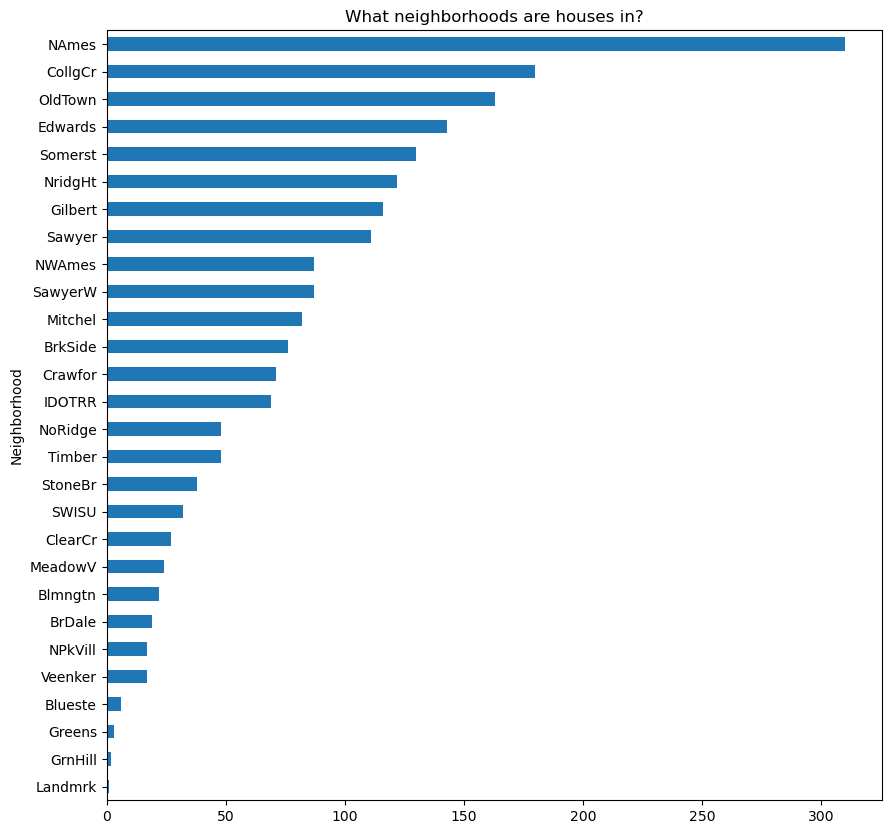

In [35]:
df_train.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='barh', figsize=(10,10))
plt.title('What neighborhoods are houses in?')
plt.show()

''

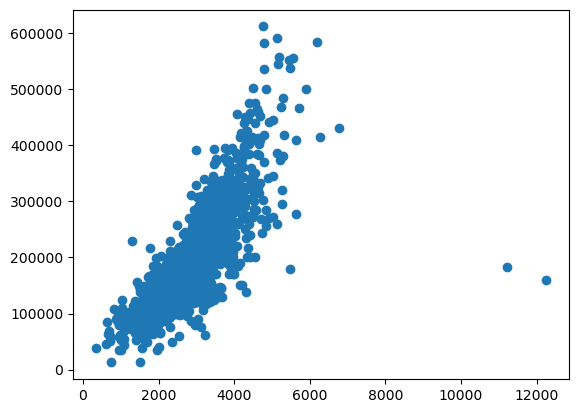

In [50]:
plt.scatter(df_train['Total_Sqft'], df_train['SalePrice'])
plt.savefig('total_sqft_saleprice.png', bbox_inches='tight')
;

The average house has 1,499 sq ft of space, the median 1,444 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


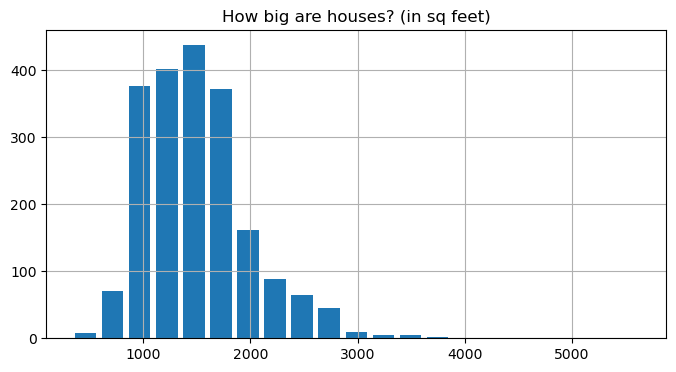

In [49]:
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    df_train['Gr Liv Area'].mean(), df_train['Gr Liv Area'].median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    df_train['Gr Liv Area'].max(), df_train['Gr Liv Area'].min()))
df_train['Gr Liv Area'].hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are houses? (in sq feet)')

plt.savefig('how_big_are_avg._houses.png', bbox_inches='tight')

plt.show()

The average lot is 0.23 acres, the median 0.22 acres
The biggest lot is 3.65 acres, the smallest 0.03 acres


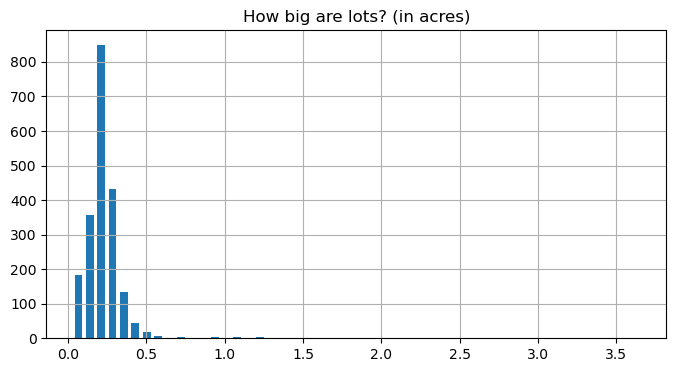

In [38]:
sqft_to_acres = 43560.
print('The average lot is {:,.2f} acres, the median {:,.2f} acres'.format(
    df_train['Lot Area'].mean()/sqft_to_acres, df_train['Lot Area'].median()/sqft_to_acres))
print('The biggest lot is {:,.2f} acres, the smallest {:,.2f} acres'.format(
    df_train['Lot Area'].max()/sqft_to_acres, df_train['Lot Area'].min()/sqft_to_acres))
(df_train['Lot Area']/sqft_to_acres).hist(bins=50, rwidth=.7, figsize=(8,4))
plt.title('How big are lots? (in acres)')
plt.show()

/var/folders/hd/8z3slh4d16d2yvs205jh8smw0000gn/T/ipykernel_44138/1110029061.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.SalePrice)


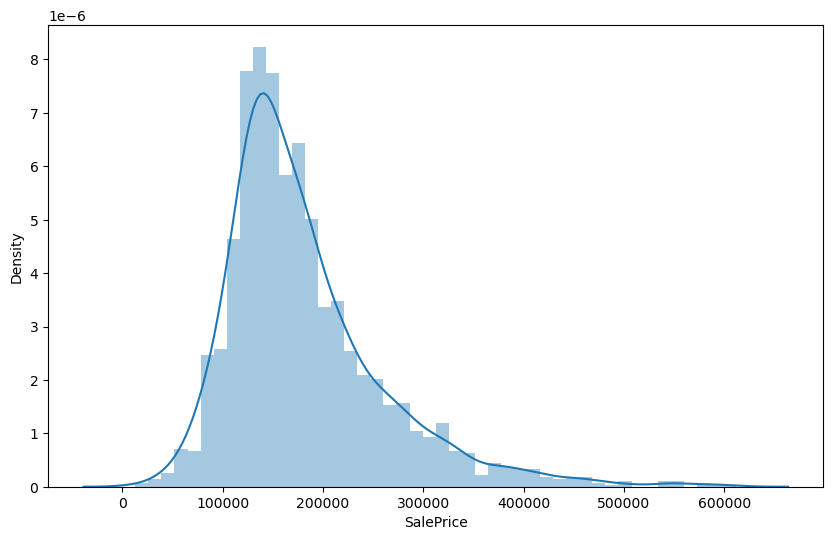

In [39]:
plt.figure(figsize=(10,6))
sns.distplot(df_train.SalePrice)
plt.show()

In [40]:
def get_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    
    num_features = df_train.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    cat_features = df_train.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

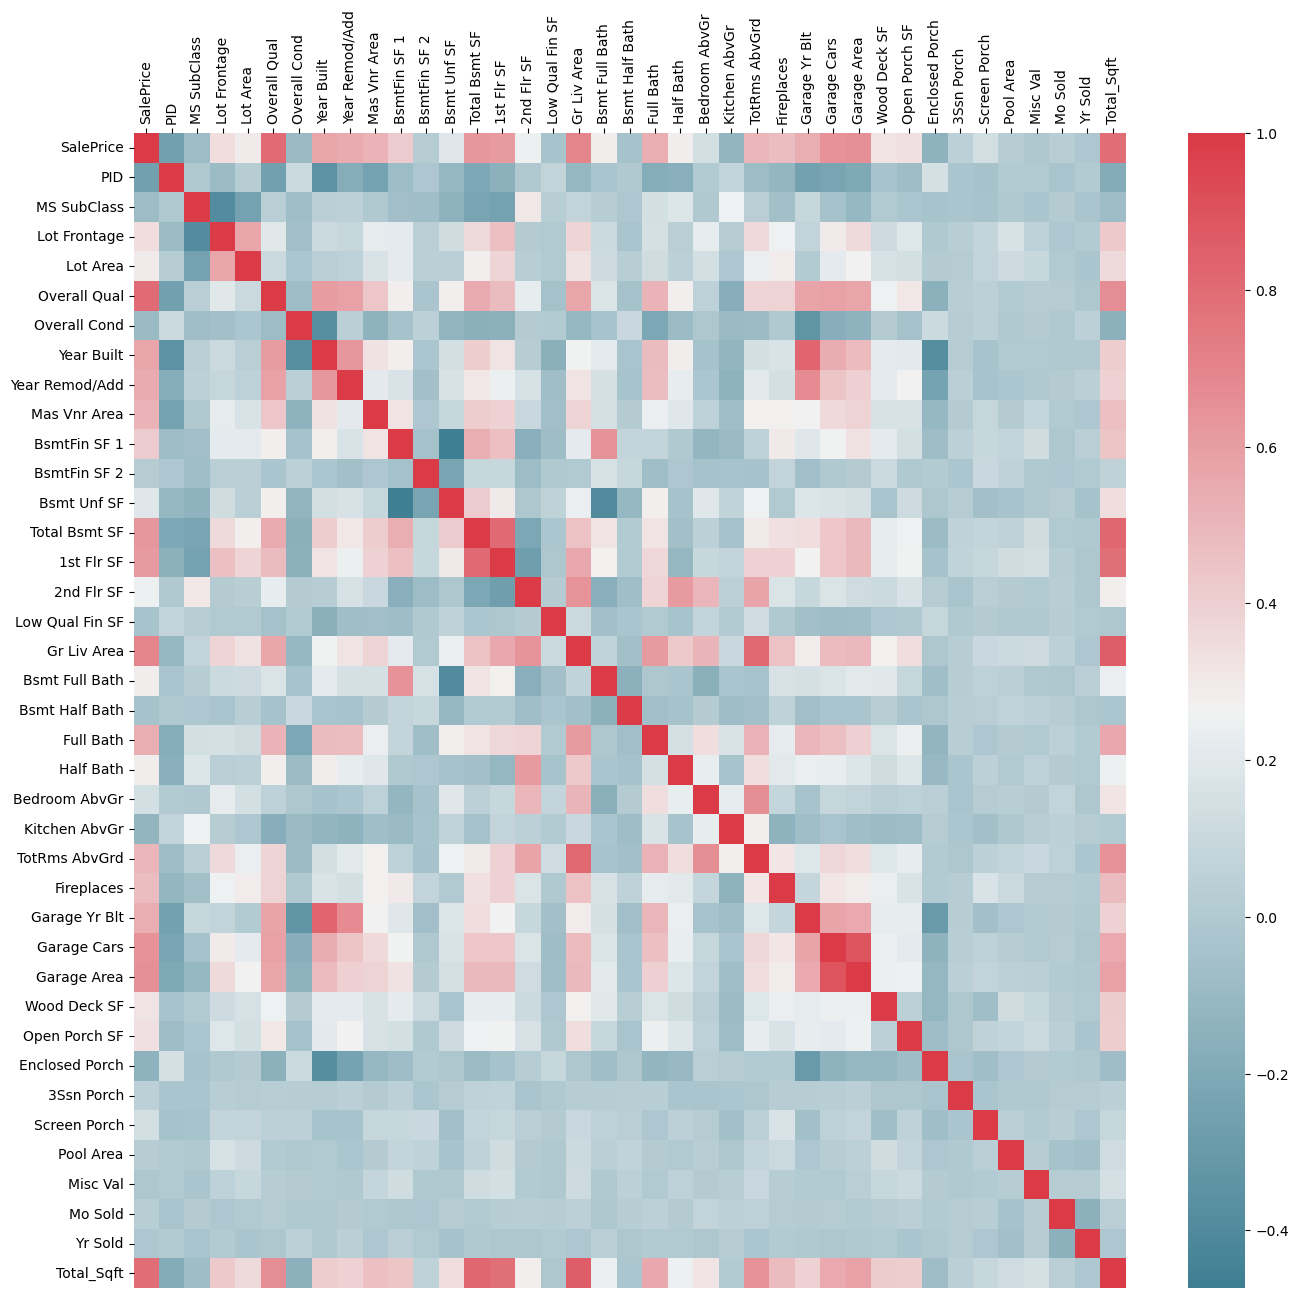

In [48]:
corr = df_train[['SalePrice'] + num_features].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig('correlation_saleprice_otherfeature.png', bbox_inches='tight')

plt.show()

We see that there is quite bit of correlation between features, 
we find that GarageYrBlt is highly correlated with YearBuilt, which means that most garages were built along with the house. BsmtQual correlates with OverallQual and TotalBsmtSF correlates highly with 1stFlrSF, which both make a lot of sense.

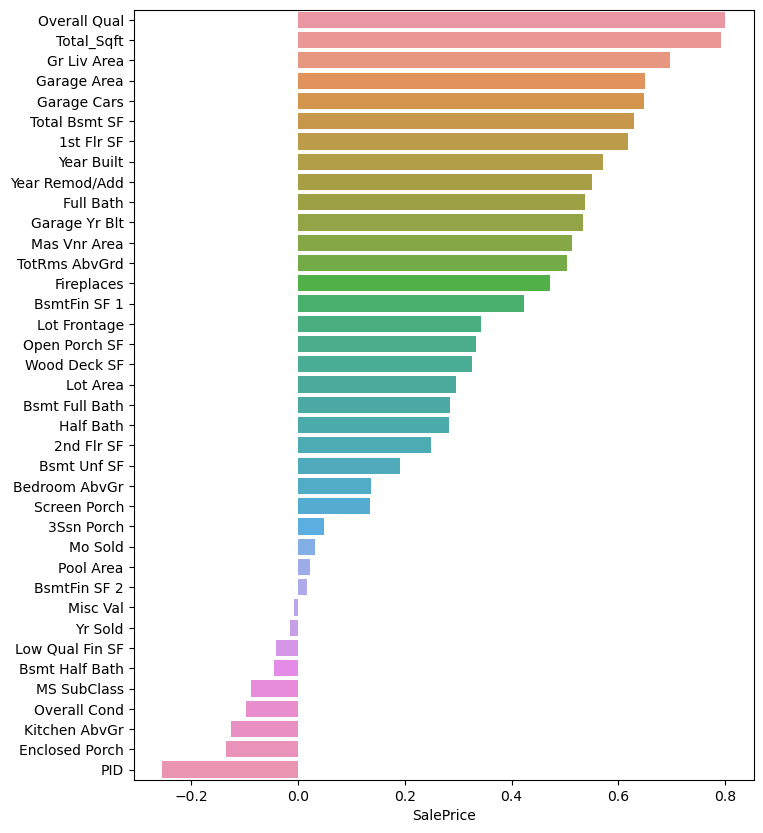

In [47]:
plt.figure(figsize=(8,10))
sns.barplot(x=corr.SalePrice[1:], y=corr.index[1:], orient='h')
plt.savefig('correlation_SalePrice_barplot.png', bbox_inches='tight')

plt.show()


The feature most correlated with SalePrice is OverallQual
Followed by the size of the house (GrLivArea) and then three more quality related features: ExterQual, KitchenQual, and BsmtQual. 
We noted earlier that ExterQual and KitchenQual were highly correlated with one another, and now we find out that they are both also highly correlated with SalePrice.

/Users/rajashreechoudhary/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/hd/8z3slh4d16d2yvs205jh8smw0000gn/T/ipykernel_44138/295297553.py:6: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()


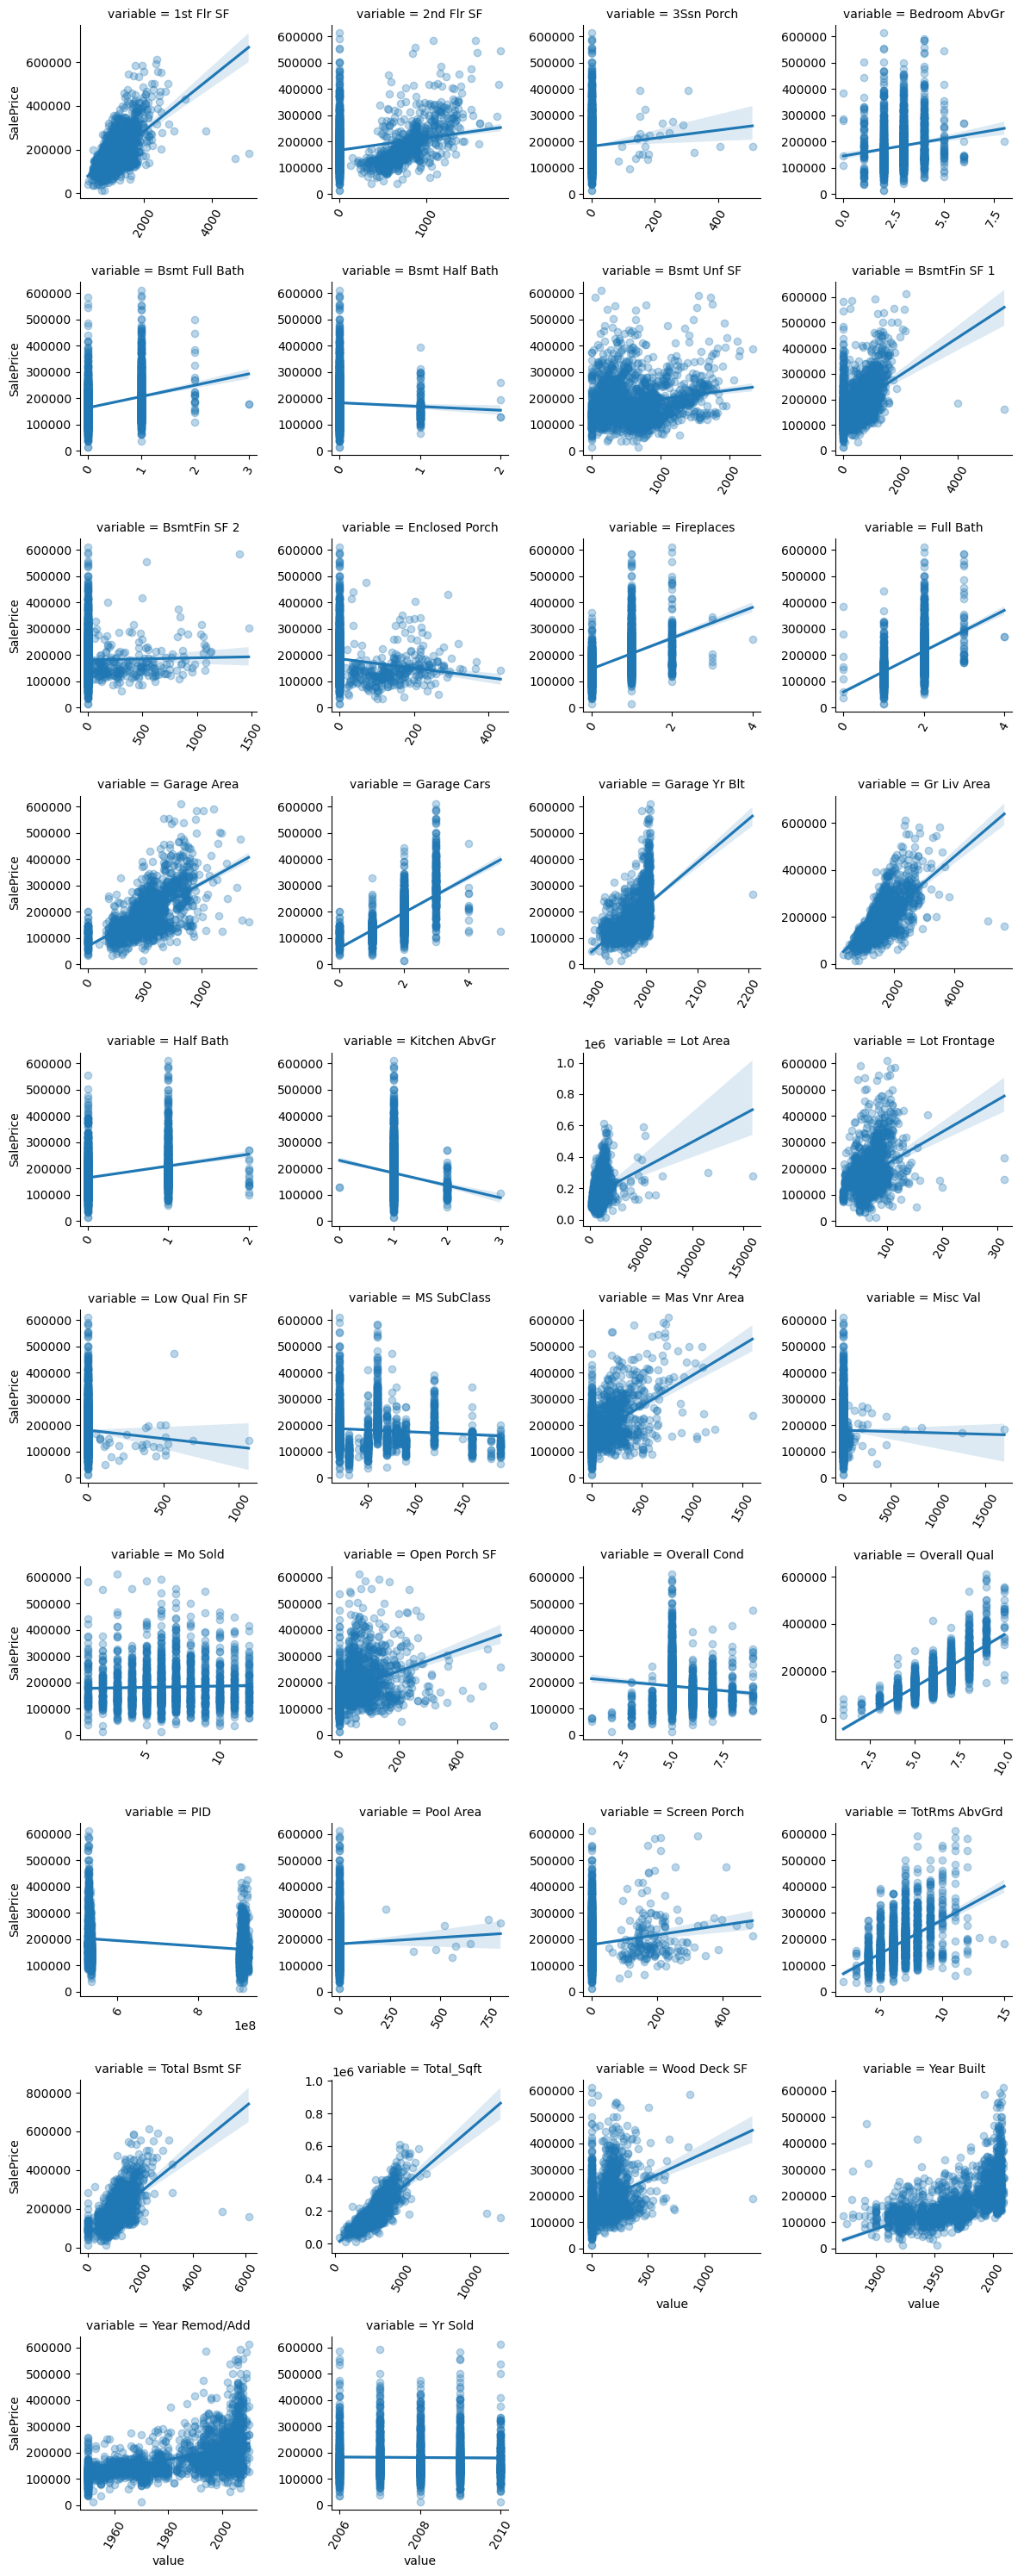

In [46]:
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()

plt.savefig('correlation_barplot.png', bbox_inches='tight')

plt.show()


We find that there are quite a few features that seem to show strong correlation to SalePrice, 
such as OverallQual, TotalBsmtSF, GrLivArea, and TotRmsAbvGrd. This confirms our natural intuition: we would expect that high quality, big house with big basements and lots of rooms to be more expensive.